# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [35]:
# your code here

# Function to simulate rolling a dice
def roll_dice():
    return np.random.randint(1, 7)

# Simulate rolling a dice 10 times
results = [roll_dice() for i in range(10)]

# Save the results in a dataframe
df = pd.DataFrame({'Roll': results})

#just to check if the answers are correct in the next questions
df.describe()

,Roll
count,10.000000
mean,2.900000
std,1.449138
min,1.000000
25%,2.000000
50%,3.000000
75%,3.750000
max,5.000000


#### 2.- Plot the results sorted by value.

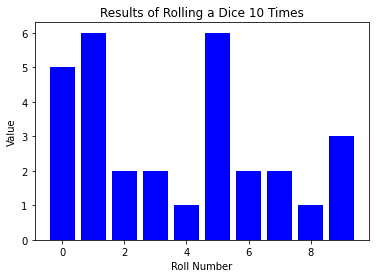

In [6]:
# Sort the results
df = df.sort_values(by='Roll')

# Plot the results
plt.bar(df.index, df['Roll'], color='blue')
plt.xlabel('Roll Number')
plt.ylabel('Value')
plt.title('Results of Rolling a Dice 10 Times')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

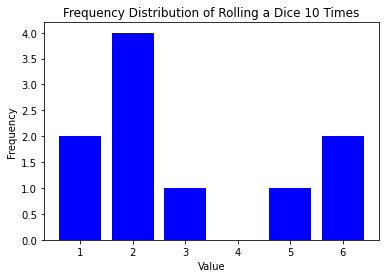

In [7]:
# your code here

# Calculate the frequency distribution
frequency = df['Roll'].value_counts().sort_index()

# Plot the frequency distribution
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rolling a Dice 10 Times')
plt.show()

In [ ]:
"""
your comments here

the first plot provides a sequence of the individual rolls, while the second plot gives an overview of how often 
each value appears among all the rolls. The frequency distribution plot aggregates the information from the first 
plot to give a more comprehensive understanding of the distribution of values in the set of rolls.

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here

def mean(observations):
    return sum(observations) / len(observations)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
frequency = df['Roll'].value_counts().sort_index()
mean(frequency)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [17]:
# your code here
def median(observations):
    n = len(observations)
    if n == 0:
        return None
    sorted_obs = sorted(observations)
    if n % 2 == 0:
        return (sorted_obs[n // 2 - 1] + sorted_obs[n // 2]) / 2
    else:
        return sorted_obs[n // 2]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [28]:
# your code here

def quartiles(observations):
    n = len(observations)

    if n == 0:

        return None

    sorted_obs = sorted(observations)

    Q1 = median(sorted_obs[:n // 2])

    Q2 = median(sorted_obs)

    if n % 2 == 0:

        Q3 = median(sorted_obs[n // 2:])

    else:

        Q3 = median(sorted_obs[n // 2 + 1:])

    return Q1, Q2, Q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [39]:
import pandas as pd

# Read the csv file
data = pd.read_csv('roll_the_dice_hundred.csv')

# Print it out
data.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  100 non-null    int64
 1   roll        100 non-null    int64
 2   value       100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [36]:
data.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


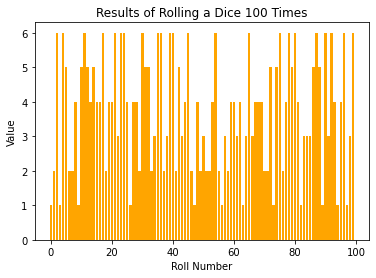

In [47]:
# your code here
# Sort the results
data = data.sort_values(by='value')

# Plot the results
plt.bar(data.index, data['value'], color='orange')
plt.xlabel('Roll Number')
plt.ylabel('Value')
plt.title('Results of Rolling a Dice 100 Times')
plt.show()


"""
your comments here

In the plot, we see the frequency distribution of the dice roll results.
The y-axis represents the possible dice roll outcomes (1 to 6) and the x-axis represents the frequency or
the number of times each outcome occurred in the 100 rolls. The plot helps us visualize the distribution of 
the results and identify any patterns or trends. We are able to observe that some outcomes occurred more frequently 
than others.

"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [49]:
# your code here

mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [50]:
# your code here
frequency = data['value'].value_counts().sort_index()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

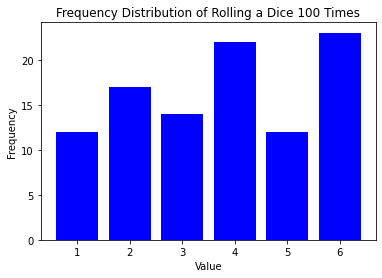

In [51]:
# your code here
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rolling a Dice 100 Times')
plt.show()

In [ ]:
"""
your comments here

there is a better distribution here than the previous one in challenge 1

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

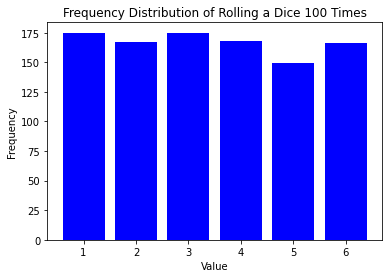

In [55]:
# your code here

data_2 = pd.read_csv('roll_the_dice_thousand.csv')
frequency = data_2['value'].value_counts().sort_index()
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rolling a Dice 100 Times')
plt.show()

In [ ]:
"""
your comments here

Better distribution than the previous one.

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [61]:
# your code here

data = pd.read_csv('ages_population.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


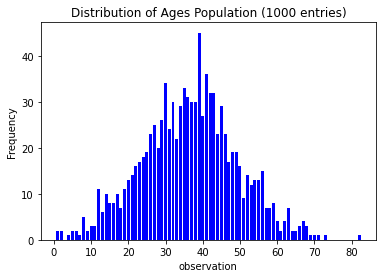

In [62]:
frequency = data['observation'].value_counts().sort_index()
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Population (1000 entries)')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [63]:
# your code here

data.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [64]:
"""
your comments here

"""

'\nyour comments here\n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [65]:
# your code here
data = pd.read_csv('ages_population2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


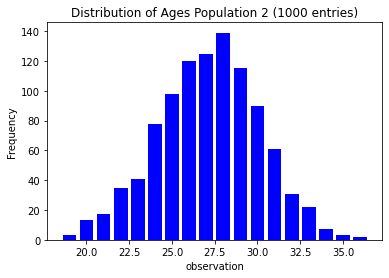

In [67]:
frequency = data['observation'].value_counts().sort_index()
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Population 2 (1000 entries)')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

The distribution seems more "natural", with less deviation.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [68]:
# your code here

data.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here

The standard deviation in smaller, that's why.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [69]:
# your code here

df = pd.DataFrame.from_dict(colors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


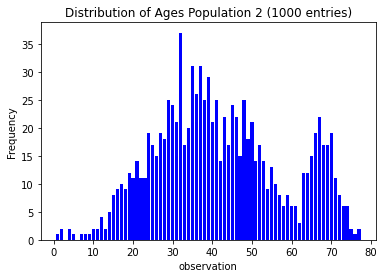

In [70]:
frequency = data['observation'].value_counts().sort_index()
plt.bar(frequency.index, frequency.values, color='blue')
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Population 2 (1000 entries)')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [71]:
# your code here

data.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here

Bigger strandard deviation. So the distribution is spread out. We can also observe another bell curve in the plot.

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
# your code here

quartiles(data['observation'])

(30.0, 40.0, 53.0)

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [78]:
# your code here

print(data.observation.quantile(0.10))
print(data.observation.quantile(0.20))
print(data.observation.quantile(0.30))
print(data.observation.quantile(0.40))
print(data.observation.quantile(0.50))
print(data.observation.quantile(0.60))
print(data.observation.quantile(0.70))
print(data.observation.quantile(0.80))
print(data.observation.quantile(0.90))

22.0
28.0
32.0
36.0
40.0
45.0
50.0
57.0
67.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""